--------------------
#### Movie Sentiment Analysis 

- IMDB dataset
- TF-IDF vectors
- Multinomial Naive Bayes 
- Evaluate
----------------------

#### dataset 

can be downloaded from this Kaggle link.https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

The file contains 50,000 records and two columns: review and sentiment. 

The review column contains text for the review and the sentiment column contains sentiment for the review. 

The sentiment column can have two values i.e. "positive" and "negative" which makes our problem a binary classification problem.

In [40]:
import pandas as pd
import numpy as np

#### Importing and Analyzing the Dataset

In [41]:
location = r'D:\AI-DATASETS\02-MISC-large\keras\datasets\IMDB-cleaned-text.csv'

In [42]:
movie_reviews = pd.read_csv(location)

In [43]:
movie_reviews.isnull().values.any()

False

In [44]:
movie_reviews.shape

(50000, 6)

In [45]:
pd.set_option('max_colwidth', None)

In [46]:
movie_reviews.sample(3)

Unnamed: 0  \
6043         6043   
1696         1696   
15483       15483   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

D:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


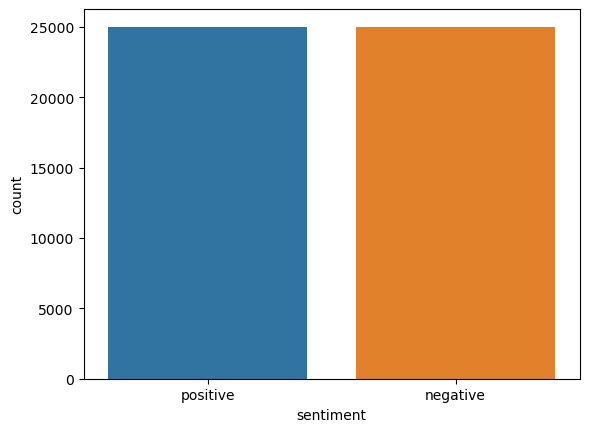

In [8]:
import seaborn as sns

sns.countplot(x='sentiment', data=movie_reviews);

Next, we need to convert our labels into digits. 

Since we only have two labels in the output i.e. "positive" and "negative".

We can simply convert them into integers by replacing "positive" with digit 1 and negative with digit 0

In [47]:
y = movie_reviews['sentiment']

y = np.array(list(map(lambda x: 1 if x=="positive" else 0, y)))

Finally, we need to divide our dataset into train and test sets. The train set will be used to train our deep learning models while the test set will be used to evaluate how well our model performs.

We can use train_test_split method from the sklearn.model.selection module

In [12]:
X = movie_reviews['CleanedText']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size   = 0.20, 
                                                    random_state= 42)

#### train a TF-IDF Vectorizer

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
%%time
# Create count vectorizer
vectorizer = TfidfVectorizer()

train_matrix = vectorizer.fit_transform(X_train)

CPU times: total: 6.72 s
Wall time: 19.7 s


In [17]:
%%time
test_matrix = vectorizer.transform(X_test)

CPU times: total: 1.95 s
Wall time: 4.84 s


#### train a ML model

**Naive Bayes**

In [18]:
from sklearn.naive_bayes import MultinomialNB

In [19]:
# Initialize the Multinomial Naive Bayes classifier
mnb = MultinomialNB()

# Train the classifier on the training data
mnb.fit(train_matrix, y_train)

MultinomialNB()

In [20]:
# Make predictions on the test data
y_pred = mnb.predict(test_matrix)

#### Evaluate

In [21]:
from sklearn.metrics import accuracy_score, classification_report

In [22]:
# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report_result)

Accuracy: 0.8641
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.87      4961
           1       0.89      0.84      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.87      0.86      0.86     10000



In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
confusion_matrix(y_test, y_pred)

array([[4412,  549],
       [ 810, 4229]], dtype=int64)

In [25]:
# FALSE POSITIVE
X_test[(y_test==0) & (y_pred ==1)]

# Same as
# X_test[y_pred_class > y_test==0]

24712                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [26]:
# Calculate the predicted proobabilities for X_test
mnb.predict_proba(test_matrix)[:20]

array([[0.41638782, 0.58361218],
       [0.24468108, 0.75531892],
       [0.91813651, 0.08186349],
       [0.16546289, 0.83453711],
       [0.6851621 , 0.3148379 ],
       [0.14263684, 0.85736316],
       [0.16284902, 0.83715098],
       [0.62790198, 0.37209802],
       [0.71330229, 0.28669771],
       [0.80077332, 0.19922668],
       [0.84235302, 0.15764698],
       [0.22153957, 0.77846043],
       [0.92900112, 0.07099888],
       [0.84877965, 0.15122035],
       [0.92979544, 0.07020456],
       [0.41430541, 0.58569459],
       [0.4930601 , 0.5069399 ],
       [0.42886955, 0.57113045],
       [0.46273585, 0.53726415],
       [0.58731703, 0.41268297]])

In [27]:
mnb.predict_proba(test_matrix).shape

(10000, 2)

In [28]:
# Calculate the predicted probabilities for X-test_dtm (poorly caliberated)
# why 1
# positive class
y_pred_proba = mnb.predict_proba(test_matrix)[:, 1]
y_pred_proba

array([0.58361218, 0.75531892, 0.08186349, ..., 0.50795688, 0.33760579,
       0.49727555])

In [29]:
print(y_test.shape)
print(y_pred_proba.shape)

(10000,)
(10000,)


In [30]:
from sklearn.metrics import roc_auc_score, roc_curve

In [31]:
# Calculate AUC

roc_auc_score(y_test, y_pred_proba)

0.939730893227544

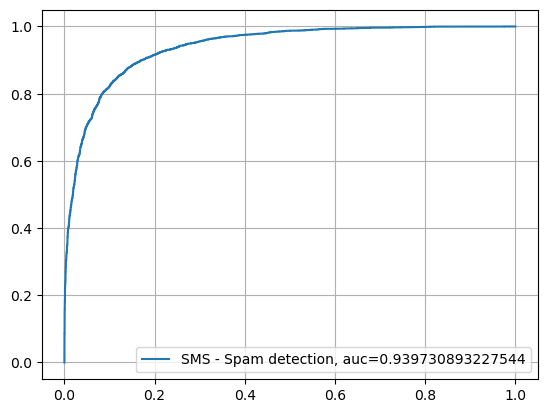

In [32]:
import matplotlib.pyplot as plt
y_pred_proba = mnb.predict_proba(test_matrix)[:,1]

# sklearn.metrics.roc_curve(y_true, y_score, pos_label=None, sample_weight=None, drop_intermediate=True)
# sklearn.metrics.roc_curve(y_true, y_score, pos_label=None)
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)

auc = roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label="SMS - Spam detection, auc="+str(auc))
plt.legend(loc=4)
plt.grid();

#### Explore the most freq pos/neg words in terms of TF-IDF score

In [34]:
# Get feature names and TF-IDF scores
feature_names = vectorizer.get_feature_names_out()

In [35]:
feature_names

array(['aa', 'aaa', 'aaaaaaaaaaaahhhhhhhhhhhhhh', ...,
       'zzzzzzzzzzzzzzzzzz', 'zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz',
       'zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz'], dtype=object)

In [36]:
tfidf_scores = train_matrix.sum(axis=0).A1

In [37]:
tfidf_scores

array([1.15005654, 1.27843966, 0.18720668, ..., 0.22067006, 0.15619112,
       0.15619112])

In [38]:
# Create a DataFrame to display the top 100 words and their TF-IDF scores
df_tfidf = pd.DataFrame({'Word': feature_names, 'TF-IDF Score': tfidf_scores})
df_tfidf = df_tfidf.sort_values(by='TF-IDF Score', ascending=False).head(100)

In [39]:
df_tfidf

,Word,TF-IDF Score
81570,the,6873.427064
2724,and,3465.386107
41669,is,3124.087232
57137,of,3089.230865
82644,to,2915.433749
...,...,...
73474,show,413.350368
41268,into,408.015229
81686,then,407.815372
89206,way,404.788897


#### Conclusion
- improved results compared to count
- many of the top words are common among the positive and negative comments
- many top words seem like stop words
- need for more pre-processing
- need for a better vectorizer